# Práctica 01

### Vargas Bravo Paola 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [2]:
datos = pd.read_csv("datos.csv")

In [3]:
datos

,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,NaN
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,NaN
4,Juan González,Díaz,125,70.0
5,Juan García,Fernández,47,40.0
6,Luis Romero,López,149,100.0
7,Miguel Fernández,Romero,162,80.0
8,Carmen Pérez,Álvarez,139,45.0
9,Juan Rodríguez,Romero,18,30.0


In [4]:
df = pd.DataFrame(datos)
df

,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,NaN
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,NaN
4,Juan González,Díaz,125,70.0
5,Juan García,Fernández,47,40.0
6,Luis Romero,López,149,100.0
7,Miguel Fernández,Romero,162,80.0
8,Carmen Pérez,Álvarez,139,45.0
9,Juan Rodríguez,Romero,18,30.0


### El mínimo, máximo, media y desviación estándar tanto para el número de horas dedicadas como para las calificaciones obtenidas.

In [5]:
horas_max = df["horas_dedicadas"].max()
cali_max = df["calificaciones_obtenida"].max()
print(horas_max)
print(cali_max)

178
100.0


In [6]:
horas_min = df["horas_dedicadas"].min()
cali_min = df["calificaciones_obtenida"].min()
print(horas_min)
print(cali_min)

2
0.0


In [7]:
horas_media = df["horas_dedicadas"].mean()
cali_media = df["calificaciones_obtenida"].mean()
print(horas_media)
print(cali_media)

99.4
64.05555555555556


In [8]:
horas_DE = df["horas_dedicadas"].std()
cali_DE = df["calificaciones_obtenida"].std()
print(horas_DE)
print(cali_DE)

58.129075974801204
33.539217119177366


### Lleva a cabo un an ́alisis de regresión lineal utilizando estos datos y presenta un gráfico que muestre el modelo de regresión junto con los datos originales.

In [9]:
df = df.fillna(0)
df

,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,0.0
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,0.0
4,Juan González,Díaz,125,70.0
5,Juan García,Fernández,47,40.0
6,Luis Romero,López,149,100.0
7,Miguel Fernández,Romero,162,80.0
8,Carmen Pérez,Álvarez,139,45.0
9,Juan Rodríguez,Romero,18,30.0


In [10]:
horas_dedi = np.array(df["horas_dedicadas"]) 
calif_obt = np.array(df["calificaciones_obtenida"])

In [11]:
horas_dedi = horas_dedi.reshape(-1,1) 

In [12]:
modelo = LinearRegression()
modelo.fit(horas_dedi,calif_obt)
modeloPredic =  modelo.predict(horas_dedi)

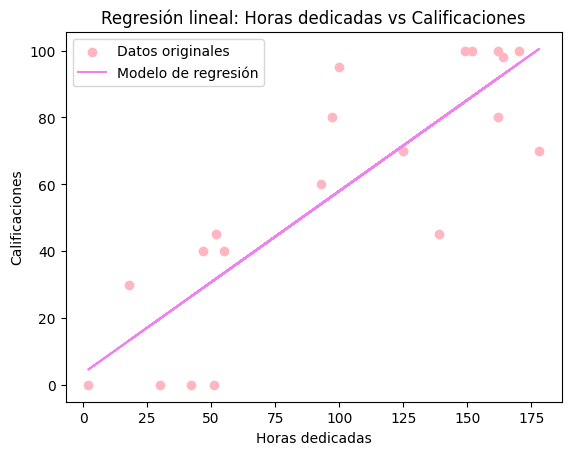

In [13]:
plt.scatter(horas_dedi, calif_obt, color='lightpink', label='Datos originales')
plt.plot(horas_dedi, modeloPredic, color='violet', label='Modelo de regresión')
plt.xlabel('Horas dedicadas')
plt.ylabel('Calificaciones')
plt.title('Regresión lineal: Horas dedicadas vs Calificaciones')
plt.legend()
plt.show()

## Utiliza el modelo de regresión para realizar una predicción de la calificación de un estudiante que hubiera dedicado n horas en el semestre a la materia (donde n es la suma de los dígitos de su número de cuenta módulo 50).

In [14]:
num_cuenta = 318074755
n_horas = sum(int(digit) for digit in str(num_cuenta)) % 50
prediccion = modelo.predict([[n_horas]])

In [15]:
print(f"Predicción de la calificación para {n_horas} horas dedicadas: {prediccion[0]}")

Predicción de la calificación para 40 horas dedicadas: 25.27758844126553


### Investiga métodos para evaluar la bondad de ajuste de tu modelo y determinar cuán efectivamente explica el comportamiento de los datos.

In [19]:
# Calcular el error cuadrático medio
mse = mean_squared_error(calif_obt, modeloPredic)
print(f"Error cuadrático medio (MSE): {mse}")

# Calcular el coeficiente de determinación (R²)
r2 = modelo.score(horas_dedi, calif_obt)
print(f"Coeficiente de determinación (R²): {r2}")

# Calcula el Error Absoluto Medio (MAE)
mae = mean_absolute_error(calif_obt, modeloPredic)

print("El Error Absoluto Medio (MAE) es:", mae)

Error cuadrático medio (MSE): 372.0000306849759
Coeficiente de determinación (R²): 0.7193358137770824
El Error Absoluto Medio (MAE) es: 16.012165580491214


###     Error Cuadrático Medio (MSE):
        El MSE es de 372 lo que indica que, en promedio, las predicciones del modelo están desviadas en raíz cuadrada de 372 unidades de las verdaderas calificaciones. Se considera que este valor  es relativamente alto, ya que sugiere que el modelo no se ajusta perfectamente a los datos y que hay un nivel significativo de discrepancia entre las predicciones y las observaciones reales.

 ###   Coeficiente de Determinación (R²):
        El R² de aproximadamente 0.719 significa que alrededor del 71.9% de la variabilidad en las calificaciones puede ser explicada por el número de horas dedicadas al estudio. Aunque este valor sugiere que el modelo tiene un ajuste moderado a los datos, aún queda una cantidad considerable de variabilidad no explicada.
        Lo que nos indica que otras variables o factores pueden estar contribuyendo a las diferencias en las calificaciones que no están siendo capturadas por el modelo actual.

### Error absoluto medio ( MAE)
        El MAE es aproximadamente 16.012. Esto significa que, nuestras predicciones del modelo tienen una desviación absoluta de 16.012 unidades de las verdaderas calificaciones.